(a) Write a Python function FirstReturnZero(N) that generates a 1D random walk, starting
at 0 and randomly adding or subtracting 1 at each step (the two possibilities are equally
likely), until the first time T when the walk returns to 0. If the random walk does not return
to zero within N steps, return N. The output should always be an integer between 1 and
N. Examples with N = 10:

- If we generate the walk 0, 1, 0, then we return 2.
- If we generate the walk 0, −1, −2, −1, −2, −1, 0, then we return 6.
  
Run this function 1000 times with N = 1000, and use matplotlib to create a histogram of
these times. Use a separate bin for each positive integer up through the maximum return
time you encounter. Describe your histogram qualitatively. Lastly, compute the average of
your 1000 return times.

Matplotlib is building the font cache; this may take a moment.


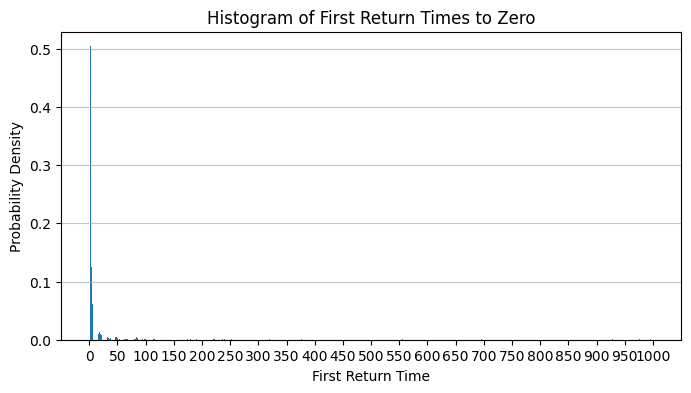

Average return time: 50.192000


In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def FirstReturnZero(N):
    position = 0
    for t in range(1, N + 1):
        position += random.choice([-1, 1])
        if position == 0:
            return t
    return N

N = 1000
num_simulations = 1000
results = [FirstReturnZero(N) for _ in range(num_simulations)]

max_time = max(results)
plt.figure(figsize=(8, 4))
plt.hist(results, bins=np.arange(1, max_time+2)-0.5, density=True)
plt.title('Histogram of First Return Times to Zero')
plt.xlabel('First Return Time')
plt.ylabel('Probability Density')
plt.xticks(np.arange(0, max_time+1, 50))
plt.grid(axis='y', alpha=0.75)
plt.show()

average_time = sum(results) / num_simulations
print(f"Average return time: {average_time:2f}")

The function FirstReturnZero(N) represents a random walk function beginning at position 0. At each step, the walker moves randomly, "-1" or "+1", chosen fairly by the function "random.choice([-1, 1]). If the walker returns to 0, the function stops and returns the number of steps taken so far (e.g., 2 for 0 -> 1 -> 0). If the walker doesn't return to 0 within N steps, the function gives up and returns N.

Example walks:
- 0 -> 1 -> 0 (returns 2)
- 0 -> -1 -> -2 -> -1 -> 0 (returns 4)
- 0 -> 1 -> 2 -> 1 -> ... never returns to 0 in N steps (returns N)

(b) Write a Python function WhosAhead(N) that takes as input a positive integer N and
does the following. Generate N fair coin flips of heads/tails (e.g., HTTHHHTHTH...), and
keep track of the number Nn of heads in the first n flips for 1 ≤ n ≤ N. Return the
proportion of times n at which the number of heads so far is greater than the number of
tails so far (in other words, Nn > n − Nn). Examples with N = 10:

- If we get HTTTHHHHHH, then there are more heads so far at times 1, 7, 8, 9, 10, so
we return 0.5.
- If we get THTHTHTHTH, then we return 0.

Run this function 1000 times with N = 1000, and use matplotlib to create a histogram of
the resulting proportions. Use 100 bins of equal width covering the interval from 0 to 1.
Describe your histogram qualitatively, and relate the overall shape of the histogram to your
answer for part (a).

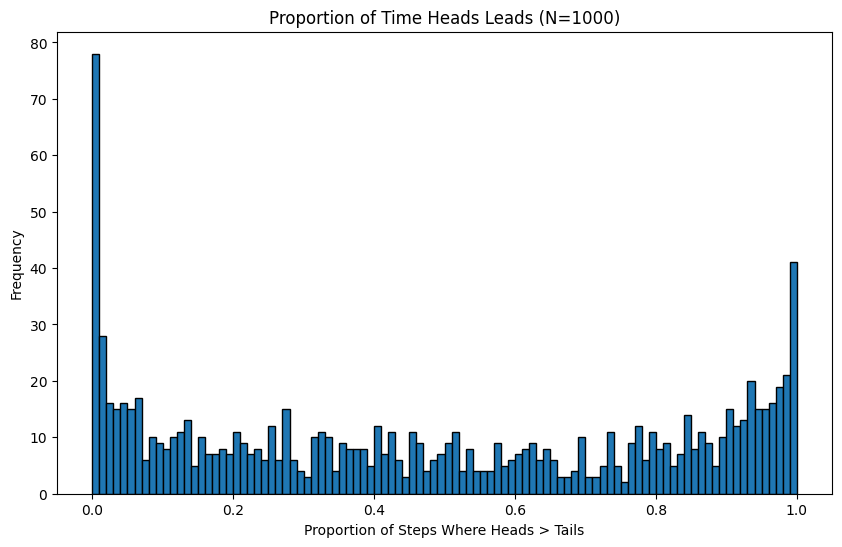

In [3]:
def WhosAhead(N):
    heads = 0
    ahead_times = 0

    for n in range(1, N + 1):
        if random.choice(['H', 'T']) == 'H':
            heads += 1
        if heads > n - heads:
            ahead_times += 1

    return ahead_times / N

N = 1000
results = [WhosAhead(N) for _ in range(1000)]

plt.figure(figsize=(10, 6))
plt.hist(results, bins=100, range=(0, 1), edgecolor='black')
plt.title('Proportion of Time Heads Leads (N=1000)')
plt.xlabel('Proportion of Steps Where Heads > Tails')
plt.ylabel('Frequency')
plt.show()


The function WhosAhead(N) simulates a sequence of N fair coin flips, tracking whether heads is in the lead after each flip, and returns the proportion of time heads remains ahead. 

Examples:
- For HTTTHHHHHH (10 flips), heads leads at steps 1, 7, 8, 9, 10 -> 5/10 = 0.5
- For THTHTHTHTH (10 flips), heads never leads -> 0.0

The resulting histogram reveals a U-shaped distribution: tall peaks near 0 and 1, with a dip in the middle. This indicates that during most trials, heads either dominates almost the entire sequence or barely leads at all, while balanced outcomes (where heads and tails are nearly tied) are rare.

This behavior mirrors our observations from part (a): just as random walks increasingly resist returning to zero over time, the U-shape here reflects how sequences tend to either stray far from equilibrium (spending most time with a clear leader) or cling to it only briefly. The connection underscores how even fair, memoryless processes naturally leans toward prolonged imbalances over perfect fairness.